In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt

import numpy as np
from scipy import stats as spstats

import sys as sys
sys.path.append('..')

from bayes.clustering.parametric.analytic import SingleGauss

<IPython.core.display.Javascript object>


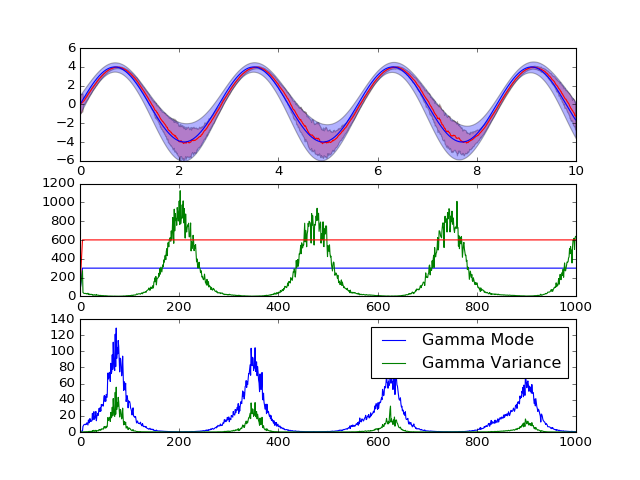

In [26]:
def prec(x, a, f):
    """Returns a precision given x and two scalars
        a for amplitude
        f for frequency
    """
    return np.exp(a*np.sin(f*x))

def mean(x, a, f):
    """Returns a mean given x and two scalars
        a for amplitude
        f for frequency
    """
    return a*np.sin(f*x)

numPoints = 100
steps = 1000
au = np.random.uniform(0., 4.)
fu = np.random.uniform(0., 4.)
ar = np.random.uniform(0., 4.)
fr = np.random.uniform(0., 4.)
sg = SingleGauss(alpha=1., beta=0.01, mup=0., scale=1.)

actualu = []
actualstdev= []
inferu = []
inferstdev = []
tfull = []

alpha = []
beta = []
scale = []

pmode = []
pvar = []

for i in range(steps):
    t = i*10./steps
    tfull.append(t)
    mu, tau = mean(t, au, fu), prec(t, ar, fr)
    
    y = np.random.normal(mu, tau**-1, numPoints)    
    
    if i > 5:
        sg.reign_beta(numPoints)
    sg.fit(y)
    
    actualu.append(mu)
    actualstdev.append(np.sqrt(tau**-1))
    
    inferu.append(sg.mup)
    inferstdev.append(np.sqrt(sg.variance()))
    
    alpha.append(sg.alpha)
    beta.append(sg.beta)
    scale.append(sg.scale)
    
    pmode.append((sg.alpha-1)/sg.beta)
    pvar.append(sg.alpha/sg.beta**2)

actualu = np.array(actualu)
actualstdev = np.array(actualstdev)
inferu = np.array(inferu)
inferstdev = np.array(inferstdev)

tscat = np.array(tscat)
yscat = np.array(yscat)

ax1 = plt.subplot(311)
plt.plot(tfull, inferu, c="r", label="Inferred")
plt.fill_between(tfull, inferu-inferstdev, inferu+inferstdev, facecolor="r", alpha=0.3)

plt.plot(tfull, actualu, c="b", label="Actual")
plt.fill_between(tfull, actualu-actualstdev, actualu+actualstdev, facecolor="b", alpha=0.3)

#scati = np.arange(0, numPoints*steps, (numPoints*steps)/100)
#plt.scatter(tscat[scati], yscat[scati])

ax2 = plt.subplot(312)
plt.plot(alpha, label="alpha")
plt.plot(beta, label="beta")
plt.plot(scale, label="scale")

ax3 = plt.subplot(313)
plt.plot(pmode, label="Gamma Mode")
plt.plot(pvar, label="Gamma Variance")

plt.legend()

<IPython.core.display.Javascript object>


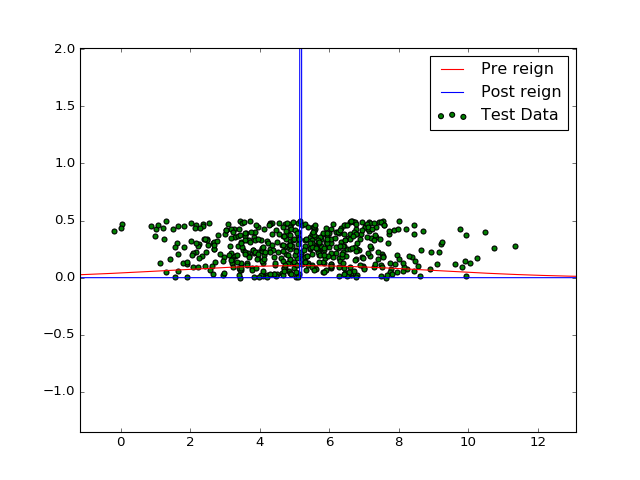

In [23]:
#```python
prec = 0.5
mean = 5.
numPoints = 500

y = np.random.uniform(0., .5, numPoints)
x = np.random.normal(mean, prec**-1, numPoints)

sg = SingleGauss(alpha=10., beta=1., mup=0., scale=1.)
sg.fit(x)
prereign = sg.predict()

sg.reign_beta(100)
postreign = sg.predict()


plotx = np.linspace(-15., 15., 1000)



plt.scatter(x, y, label='Test Data', c='g')
curve = plt.plot(plotx, prereign.pdf(plotx), c="r", label='Pre reign')
curve = plt.plot(plotx, postreign.pdf(plotx), label='Post reign')
plt.legend()
#```